## EDA Project - AirBnB

### Data Analysis

#### Usefull Imports

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from pathlib import Path

#### Read Data

In [76]:
path = Path("Airbnb_Open_Data.csv")
file_path = str(path.parent.absolute().parent.absolute()) + '\\01.Data\\Cleaned_Data.csv'
df_original = pd.read_csv(file_path)

In [77]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102067 entries, 0 to 102066
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      102067 non-null  int64  
 1   id                              102067 non-null  int64  
 2   NAME                            101832 non-null  object 
 3   host_identity_verified          102067 non-null  object 
 4   host name                       101667 non-null  object 
 5   neighbourhood group             102047 non-null  object 
 6   neighbourhood                   102052 non-null  object 
 7   lat                             102059 non-null  float64
 8   long                            102059 non-null  float64
 9   instant_bookable                101975 non-null  object 
 10  cancellation_policy             101999 non-null  object 
 11  room type                       102067 non-null  object 
 12  Construction yea

In [78]:
# copy to a new DataFrame
df = df_original.copy()

In [79]:
# convert this column to date time object
df['last review'] = pd.to_datetime(df['last review'])

In [80]:
df.drop(columns = ["Unnamed: 0"], inplace = True)

#### Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102067 entries, 0 to 102066
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102067 non-null  int64         
 1   NAME                            101832 non-null  object        
 2   host_identity_verified          102067 non-null  object        
 3   host name                       101667 non-null  object        
 4   neighbourhood group             102047 non-null  object        
 5   neighbourhood                   102052 non-null  object        
 6   lat                             102059 non-null  float64       
 7   long                            102059 non-null  float64       
 8   country                         101543 non-null  object        
 9   instant_bookable                101975 non-null  object        
 10  cancellation_policy             101999 non-null  object 

#### Correlations between columns

C:\Users\chris\AppData\Local\Temp\ipykernel_28556\987982157.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot  = True, cmap = "seismic", linewidths=.5, ax=ax)


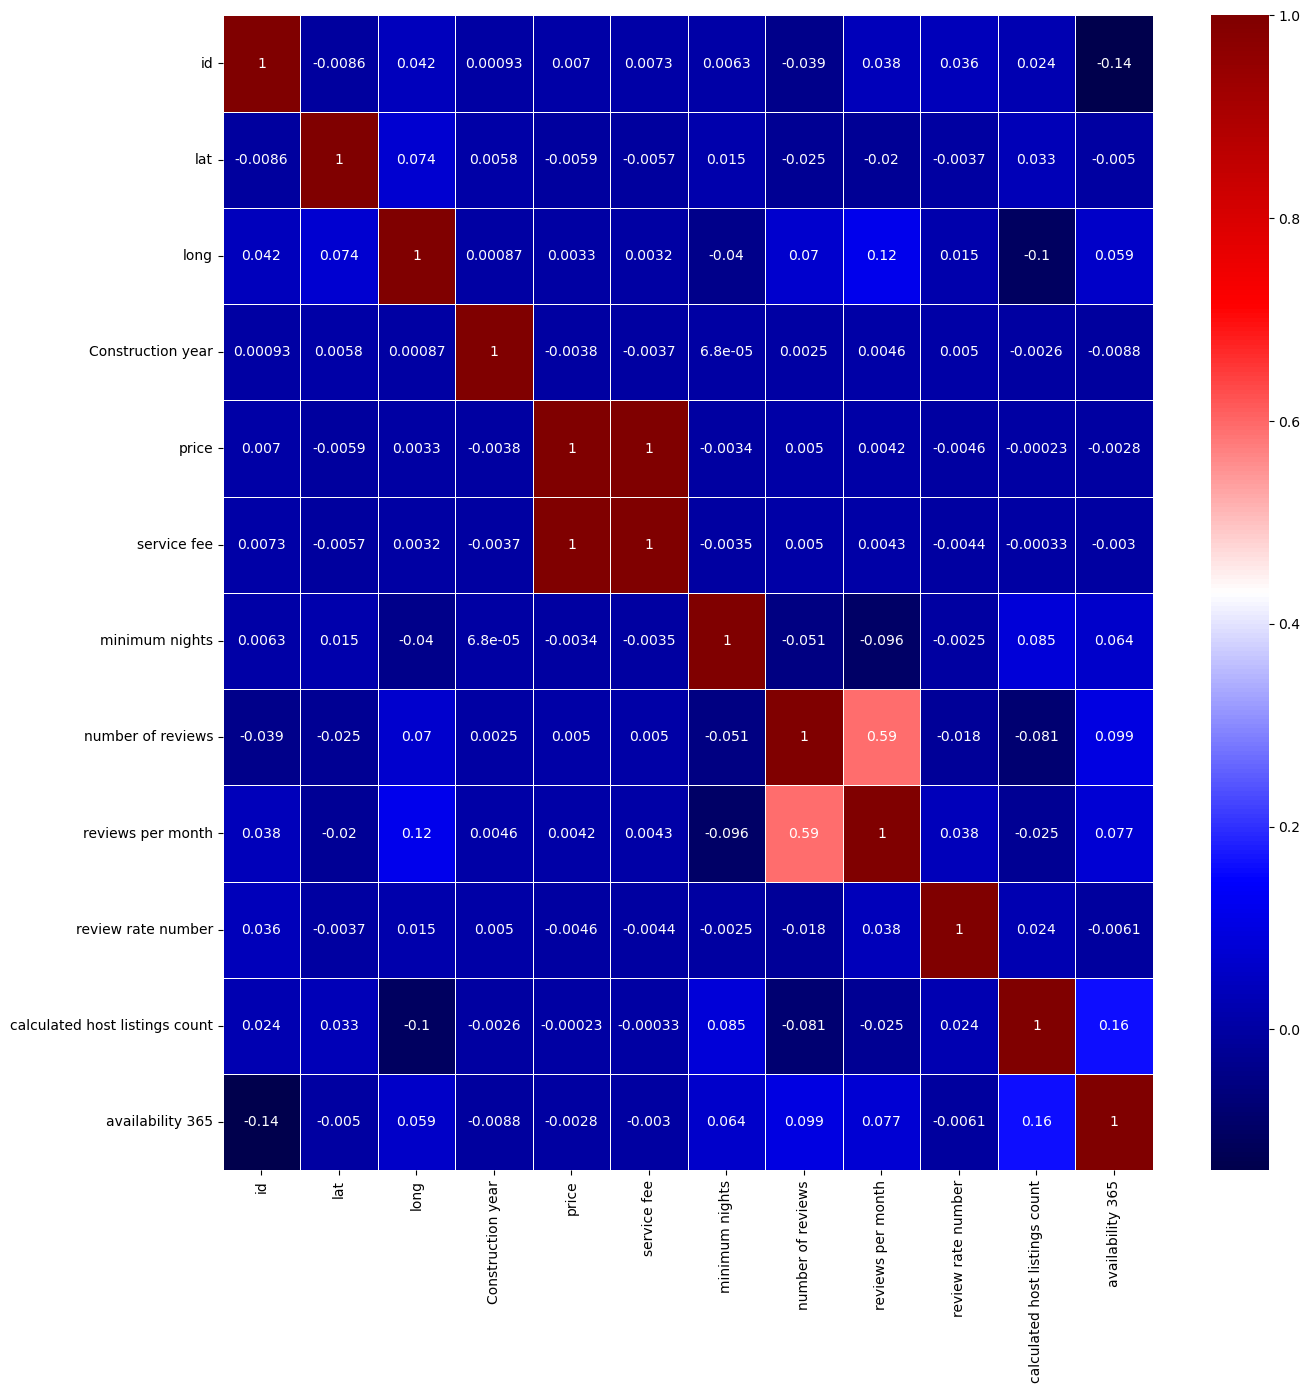

In [81]:
# Correlations
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot  = True, cmap = "seismic", linewidths=.5, ax=ax)
None

#### Mean Prices per Neighboorhood Group 

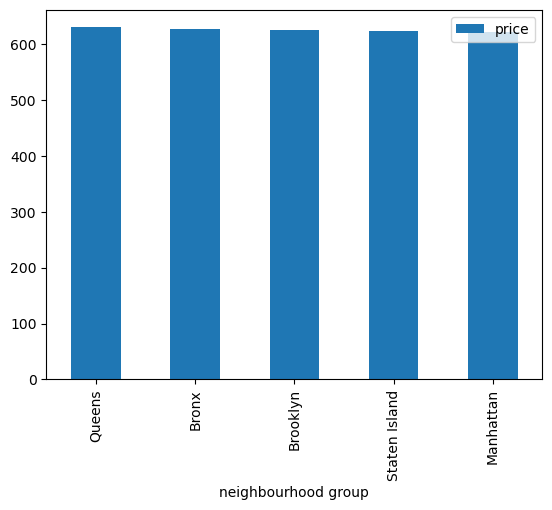

In [69]:
df.groupby(['neighbourhood group']).mean('price').sort_values('price',ascending=False)[['price']].plot.bar()
#df.groupby(['neighbourhood group']).mean('price').sort_values('price',ascending=False)[['price']].plot.bar()
None

#### Mean Ratings per Neighboorhood Group 

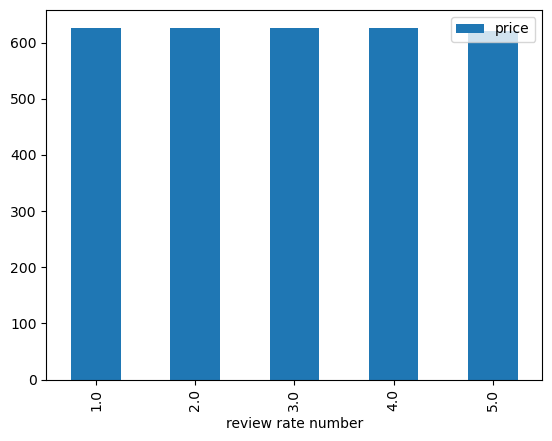

In [82]:
df.groupby(['review rate number']).mean('price')[['price']].plot.bar()
#df.groupby(['review rate number']).count()[['price']].plot.bar()
None

#### Average Review Rate by Host Identity Verification

<Figure size 800x600 with 0 Axes>

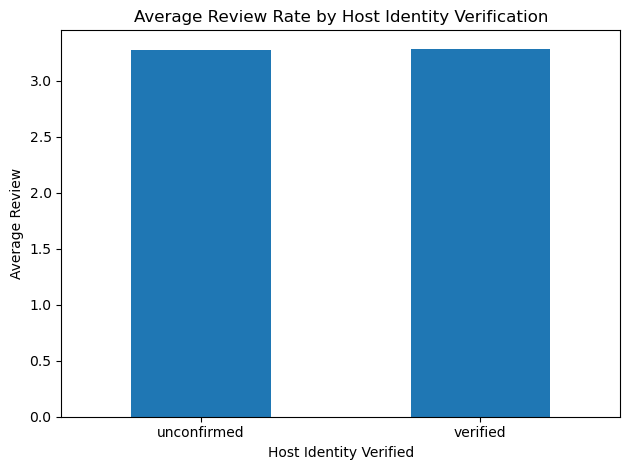

In [85]:
plt.figure(figsize=(8, 6))  # Set the figure size to adjust the plot dimensions

verified_identity = df[["host_identity_verified", "review rate number"]].groupby("host_identity_verified").mean().reset_index()

ax = verified_identity.plot(kind="bar", x="host_identity_verified", legend=False)  # Assign the plot to a variable

ax.set_xlabel("Host Identity Verified")  # Set the x-axis label
ax.set_ylabel("Average Review")  # Set the y-axis label
ax.set_title("Average Review Rate by Host Identity Verification")  # Set the plot title

plt.xticks(rotation=0)  # Rotate x-axis labels if needed

plt.tight_layout()  # Adjust the spacing between subplots and labels

plt.show()  # Display the plot

#### Average Review Rate by Real Estate Type

<Figure size 800x600 with 0 Axes>

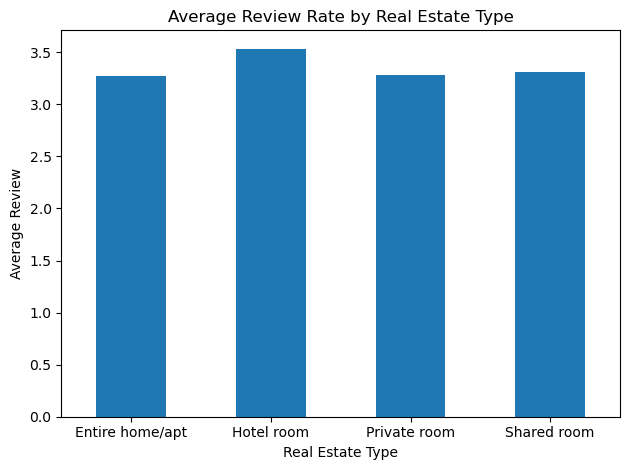

In [86]:
plt.figure(figsize=(8, 6))  # Set the figure size to adjust the plot dimensions

verified_identity = df[["room type", "review rate number"]].groupby("room type").mean().reset_index()

ax = verified_identity.plot(kind="bar", x="room type", legend=False)  # Assign the plot to a variable

ax.set_xlabel("Real Estate Type")  # Set the x-axis label
ax.set_ylabel("Average Review")  # Set the y-axis label
ax.set_title("Average Review Rate by Real Estate Type")  # Set the plot title

plt.xticks(rotation=0)  # Rotate x-axis labels if needed

plt.tight_layout()  # Adjust the spacing between subplots and labels

plt.show()  # Display the plot

#### Average Price by Real Estate Type

<Figure size 800x600 with 0 Axes>

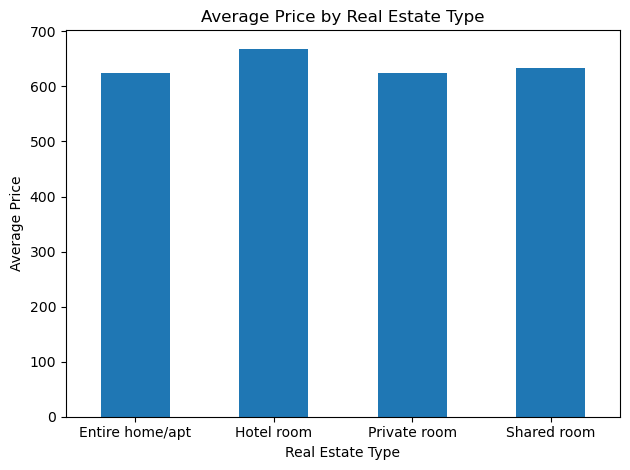

In [89]:
plt.figure(figsize=(8, 6))  # Set the figure size to adjust the plot dimensions

verified_identity = df[["room type", "price"]].groupby("room type").mean().reset_index()

ax = verified_identity.plot(kind="bar", x="room type", legend=False)  # Assign the plot to a variable

ax.set_xlabel("Real Estate Type")  # Set the x-axis label
ax.set_ylabel("Average Price")  # Set the y-axis label
ax.set_title("Average Price by Real Estate Type")  # Set the plot title

plt.xticks(rotation=0)  # Rotate x-axis labels if needed

plt.tight_layout()  # Adjust the spacing between subplots and labels

plt.show()  # Display the plot

#### Minimum Nights based on Neighbourhood

<Figure size 800x600 with 0 Axes>

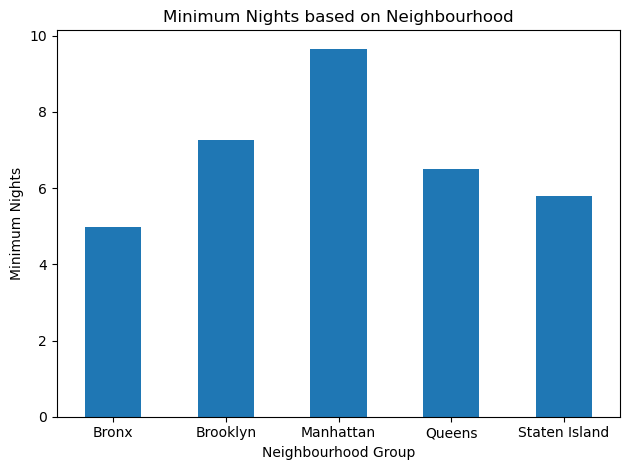

In [90]:
plt.figure(figsize=(8, 6))  # Set the figure size to adjust the plot dimensions

verified_identity = df[["neighbourhood group", "minimum nights"]].groupby("neighbourhood group").mean().reset_index()

ax = verified_identity.plot(kind="bar", x="neighbourhood group", legend=False)  # Assign the plot to a variable

ax.set_xlabel("Neighbourhood Group")  # Set the x-axis label
ax.set_ylabel("Minimum Nights")  # Set the y-axis label
ax.set_title("Minimum Nights based on Neighbourhood")  # Set the plot title

plt.xticks(rotation=0)  # Rotate x-axis labels if needed

plt.tight_layout()  # Adjust the spacing between subplots and labels

plt.show()  # Display the plot

#### Minimum Nights based on Real Easte Type

<Figure size 800x600 with 0 Axes>

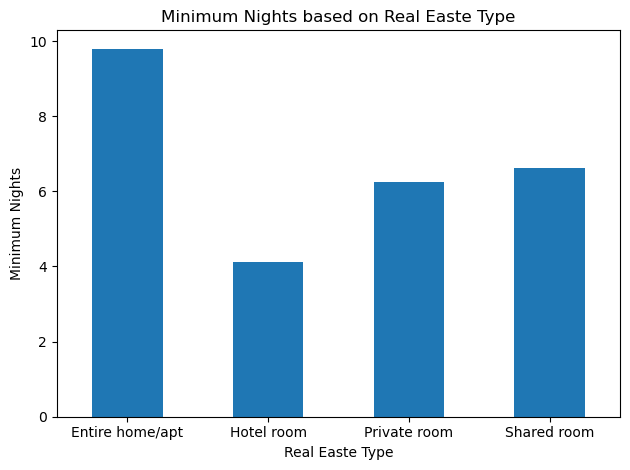

In [92]:
plt.figure(figsize=(8, 6))  # Set the figure size to adjust the plot dimensions

verified_identity = df[["room type", "minimum nights"]].groupby("room type").mean().reset_index()

ax = verified_identity.plot(kind="bar", x="room type", legend=False)  # Assign the plot to a variable

ax.set_xlabel("Real Easte Type")  # Set the x-axis label
ax.set_ylabel("Minimum Nights")  # Set the y-axis label
ax.set_title("Minimum Nights based on Real Easte Type")  # Set the plot title

plt.xticks(rotation=0)  # Rotate x-axis labels if needed

plt.tight_layout()  # Adjust the spacing between subplots and labels

plt.show()  # Display the plot

#### Minimum Nights based on Real Easte Type & Neighbourhood Groups

<Figure size 640x480 with 0 Axes>

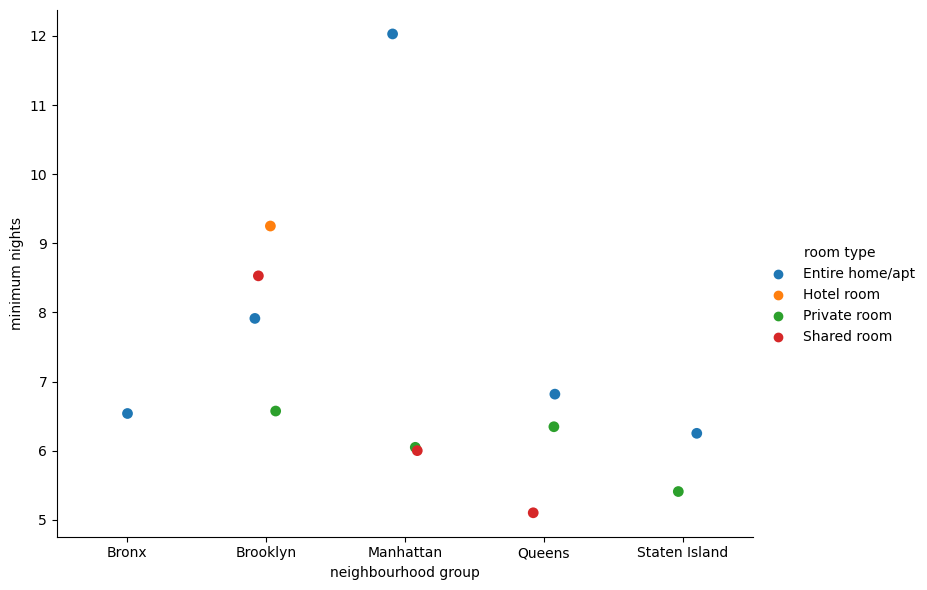

In [94]:
plt.figure()
area_room_nights  = df[["neighbourhood group", "room type" ,"minimum nights"]].groupby(["neighbourhood group", "room type"]).mean().reset_index()
area_room_nights = area_room_nights[area_room_nights["minimum nights"]>5]
sns.catplot(area_room_nights,x = "neighbourhood group",y  = 'minimum nights' ,hue  = "room type", height=6, aspect=1.3, s=60)